In [208]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='white', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 

In [209]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [210]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-3-insurance.csv')
data.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [211]:
data.duplicated().sum()
data.drop_duplicates(subset=None, keep='first', inplace=True)
data.reset_index()
data.duplicated().sum()

0

In [212]:
cat_val = ['sex', 'smoker', 'region']
orig_val_region = data.region

In [213]:
data[cat_val] = data[cat_val].apply(LabelEncoder().fit_transform)
le_val_region = data.region

In [214]:
orig_region_dic = np.unique(orig_val_region)
le_val_region = np.unique(le_val_region)
region_dic = dict(zip(orig_region_dic, le_val_region))
region_dic

{'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}

In [215]:
data.corr()['region'].sort_values(ascending=False)

region      1.000000
bmi         0.157574
children    0.016258
sex         0.004936
age         0.001626
smoker     -0.002358
charges    -0.006547
Name: region, dtype: float64

<AxesSubplot:title={'center':'Data Correlation Heatmap'}>

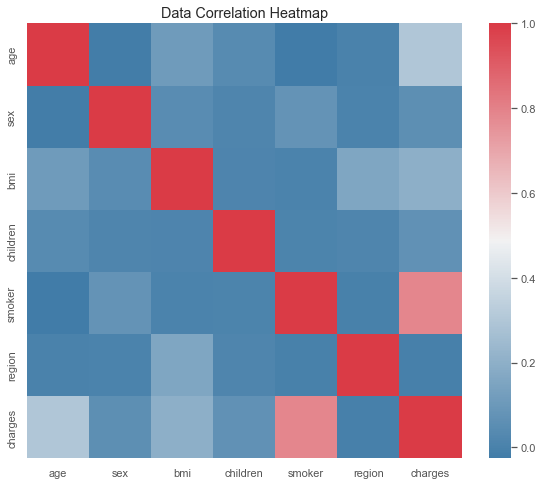

In [216]:

f,ax = plt.subplots(figsize=(10,8))
corr_data = data.corr()
ax.set_title('Data Correlation Heatmap')

sns.heatmap(corr_data, mask=np.zeros_like(corr_data, dtype=np.bool_), cmap=sns.diverging_palette(240,10, as_cmap=True), square=True, ax=ax)

<AxesSubplot:title={'center':'Southeast sex distribution'}, xlabel='sex', ylabel='Count'>

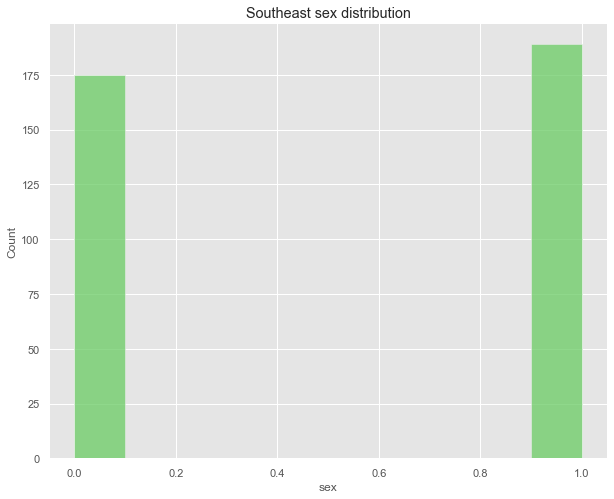

In [217]:
f, ax = plt.subplots(figsize=(10,8))
ax.set_title('Southeast sex distribution')
sns.histplot(data[(data.region == 2)]['sex'], ax=ax, color='g')

In [218]:
X = data.drop(columns=['charges'], axis=1)
y = data.charges

In [219]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(np.array(y).reshape(-1,1))


In [220]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.3)

In [221]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [222]:
linreg_pred_train = linreg.predict(x_train)
linreg_pred_test = linreg.predict(x_test)
# linreg_pred_test

In [223]:
r2_linreg_train = r2_score(y_train, linreg_pred_train)
r2_linreg_test = r2_score(y_test, linreg_pred_test)

mse_linreg_train = mean_squared_error(y_train, linreg_pred_train)
mse_linreg_test = mean_squared_error(y_test, linreg_pred_test)

In [224]:
linreg_perf = pd.DataFrame([ 
    'LinearRegression', r2_linreg_train, r2_linreg_test, mse_linreg_train, mse_linreg_test
]).transpose()

linreg_perf.columns = ['Method', 'Linreg R2 Train', 'Linreg R2 Test', 'Linreg MSE Train', 'Linreg MSE Test']
linreg_perf

,Method,Linreg R2 Train,Linreg R2 Test,Linreg MSE Train,Linreg MSE Test
0,LinearRegression,0.742396,0.763172,0.244325,0.264637


In [225]:
rand_forest = RandomForestRegressor(n_estimators=100, random_state=0, criterion='squared_error', n_jobs=-1)

rand_forest.fit(x_train,y_train)

C:\Users\amunv\AppData\Local\Temp\ipykernel_12544\253892725.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(n_jobs=-1, random_state=0)

In [226]:
train_pred_rand_forest= rand_forest.predict(x_train)
test_pred_rand_forest = rand_forest.predict(x_test)

In [227]:
mse_rand_forest_train = mean_squared_error(y_train, train_pred_rand_forest)
mse_rand_forest_test = mean_squared_error(y_test, test_pred_rand_forest)

r2_rand_forest_train = r2_score(y_train, train_pred_rand_forest)
r2_rand_forest_test = r2_score(y_test, test_pred_rand_forest)

In [228]:
rand_forest_perf = pd.DataFrame([ 
    'RandomForestRegressor', mse_rand_forest_train, mse_rand_forest_test, r2_rand_forest_train, r2_rand_forest_test
]).transpose()
rand_forest_perf.columns = ['Method', 'Rand Forest MSE Train', 'Rand Forest MSE Test', 'Rand Forest R2 Train', 'Rand Forest R2 Test']
rand_forest_perf 

,Method,Rand Forest MSE Train,Rand Forest MSE Test,Rand Forest R2 Train,Rand Forest R2 Test
0,RandomForestRegressor,0.024357,0.165029,0.974319,0.852313
